In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols of companies
ticker_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']

# Specify the time period for data retrieval
start_date = '2010-01-01'
end_date = '2025-01-01'

# Create an empty DataFrame to store the data
historical_data = pd.DataFrame()

# Iterate over each ticker symbol and retrieve historical data
for ticker_symbol in ticker_symbols:
    # Download historical data for the current ticker symbol
    # Set auto_adjust=False to get both unadjusted and adjusted close prices
    data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=False, actions=False)

    # Extract adjusted close prices and rename the column
    adj_close = data['Adj Close'].squeeze()  # Convert to Series
    adj_close = adj_close.rename(ticker_symbol)

    # Add the adjusted close prices to the historical_data DataFrame
    historical_data = pd.concat([historical_data, adj_close], axis=1)

# Display the first few rows of the combined dataset
print(historical_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                         AAPL       MSFT    AMZN       GOOG  META
2010-01-04 00:00:00  6.440331  23.254055  6.6950  15.536650   NaN
2010-01-05 00:00:00  6.451466  23.261570  6.7345  15.468233   NaN
2010-01-06 00:00:00  6.348847  23.118809  6.6125  15.078298   NaN
2010-01-07 00:00:00  6.337109  22.878382  6.5000  14.727282   NaN
2010-01-08 00:00:00  6.379241  23.036158  6.6760  14.923613   NaN


In [3]:
historical_data

,AAPL,MSFT,AMZN,GOOG,META
2010-01-04 00:00:00,6.440331,23.254055,6.695000,15.536650,NaN
2010-01-05 00:00:00,6.451466,23.261570,6.734500,15.468233,NaN
2010-01-06 00:00:00,6.348847,23.118809,6.612500,15.078298,NaN
2010-01-07 00:00:00,6.337109,22.878382,6.500000,14.727282,NaN
2010-01-08 00:00:00,6.379241,23.036158,6.676000,14.923613,NaN
...,...,...,...,...,...
2024-12-24 00:00:00,257.916443,438.450836,229.050003,197.345184,607.209778
2024-12-26 00:00:00,258.735504,437.233276,227.050003,196.875717,602.813660
2024-12-27 00:00:00,255.309296,429.668457,223.750000,193.819183,599.276855
2024-12-30 00:00:00,251.923019,423.979858,221.300003,192.470734,590.714417


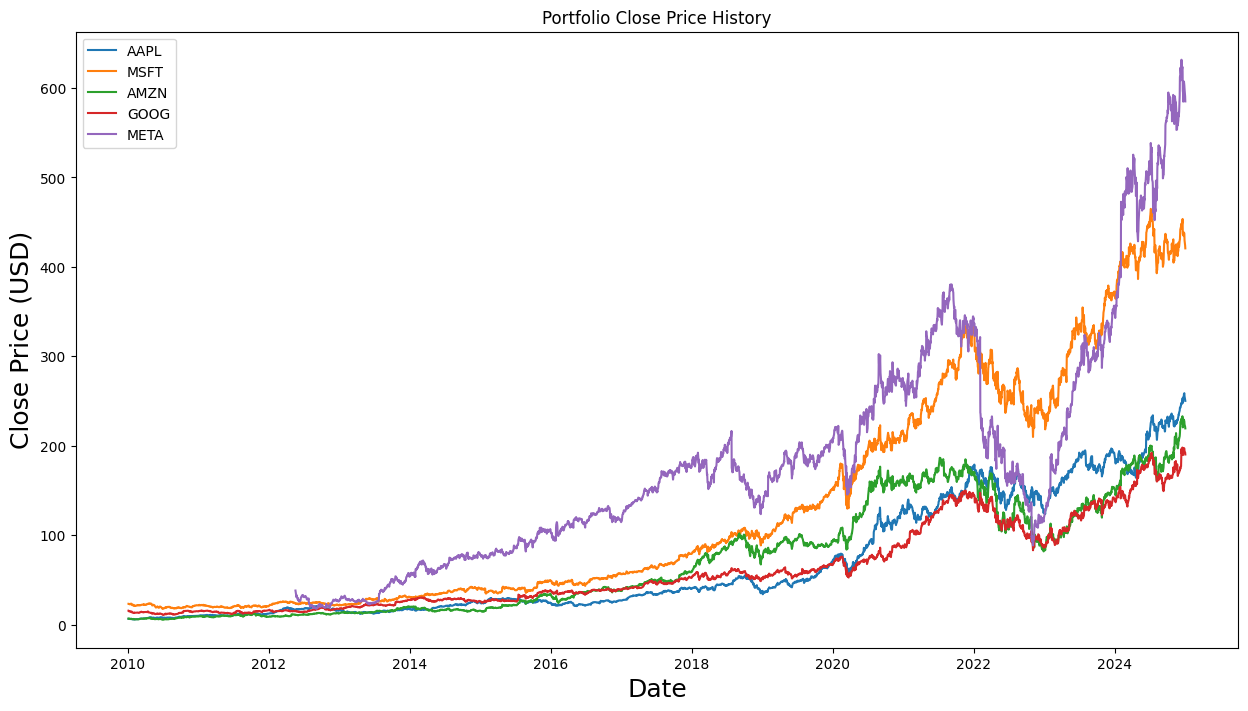

In [4]:
#set plot size
fig = plt.figure(figsize=(15,8))

# iterate through and add plot to figure
for value in historical_data.columns.values:
    plt.plot(historical_data[value], label = value)

# set plot title
plt.title("Portfolio Close Price History")
# set x-axis label
plt.xlabel("Date", fontsize=18)
# set y-axis label
plt.ylabel("Close Price (USD)", fontsize=18)
# plot details
plt.legend(historical_data.columns.values, loc = "upper left")
# show plot
plt.show(fig)

In [5]:
# calculate correlation matrix
corr_matrix = historical_data.corr(method="pearson")
# display dataframe
corr_matrix

,AAPL,MSFT,AMZN,GOOG,META
AAPL,1.000000,0.987453,0.916367,0.974751,0.862087
MSFT,0.987453,1.000000,0.936457,0.985068,0.905060
AMZN,0.916367,0.936457,1.000000,0.947812,0.909162
GOOG,0.974751,0.985068,0.947812,1.000000,0.915237
META,0.862087,0.905060,0.909162,0.915237,1.000000


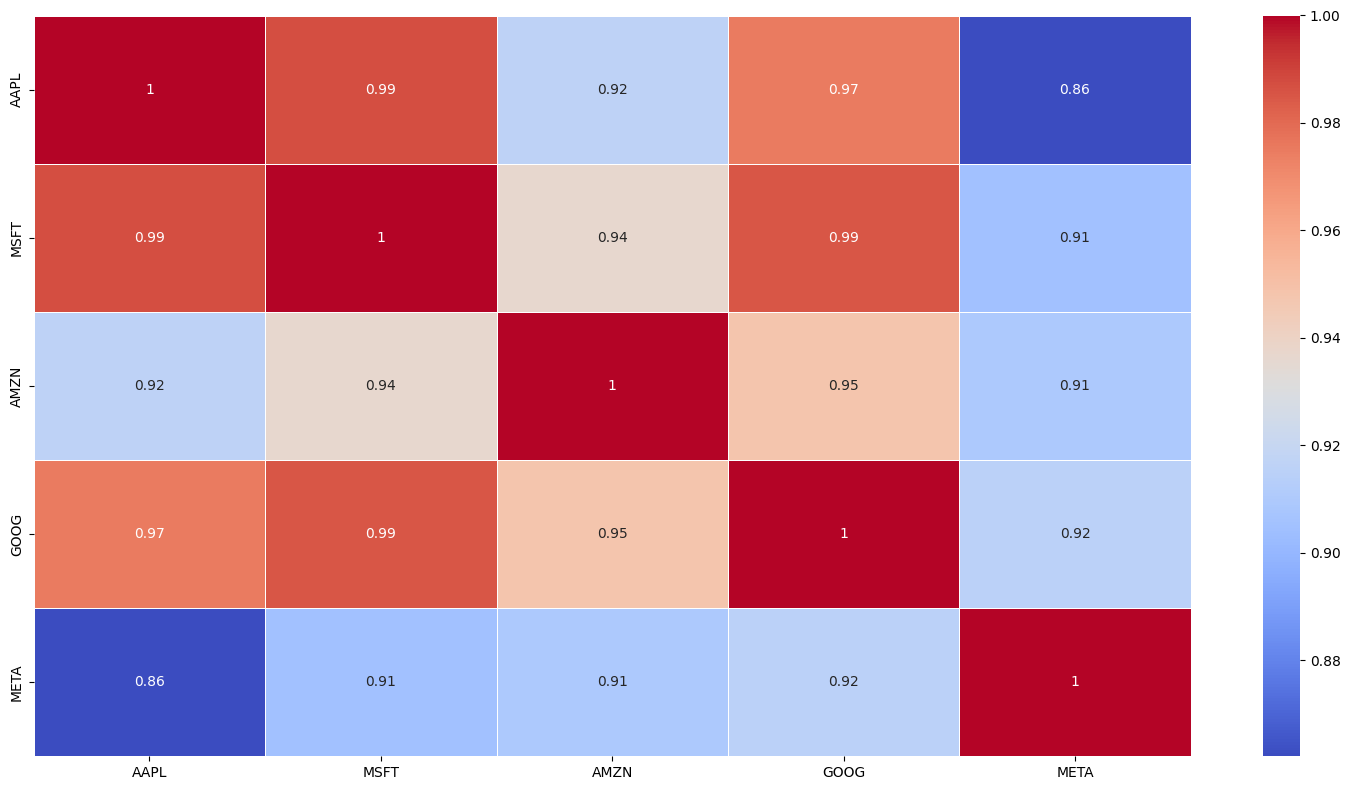

In [6]:
# Set figure size
fig = plt.figure(figsize=(15, 8))

# Plot heatmap with the 'coolwarm' colormap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cmap="coolwarm", annot=True, linewidth=0.5)

# Adjust layout for better fit
plt.tight_layout()

# Display the figure
plt.show()

In [7]:
# derive daily simple returns and drop NaN rows
returns_D1 = historical_data.pct_change(1).dropna()
# display dataframe
returns_D1

,AAPL,MSFT,AMZN,GOOG,META
2012-05-21 00:00:00,0.058260,0.016399,0.019921,0.022835,-0.109861
2012-05-22 00:00:00,-0.007679,0.000336,-0.012746,-0.021674,-0.089039
2012-05-23 00:00:00,0.024400,-0.021842,0.009056,0.014414,0.032258
2012-05-24 00:00:00,-0.009184,-0.001374,-0.009389,-0.009517,0.032187
2012-05-25 00:00:00,-0.005360,-0.000344,-0.010918,-0.020094,-0.033909
...,...,...,...,...,...
2024-12-24 00:00:00,0.011478,0.009374,0.017729,0.008062,0.013170
2024-12-26 00:00:00,0.003176,-0.002777,-0.008732,-0.002379,-0.007240
2024-12-27 00:00:00,-0.013242,-0.017302,-0.014534,-0.015525,-0.005867
2024-12-30 00:00:00,-0.013263,-0.013240,-0.010950,-0.006957,-0.014288


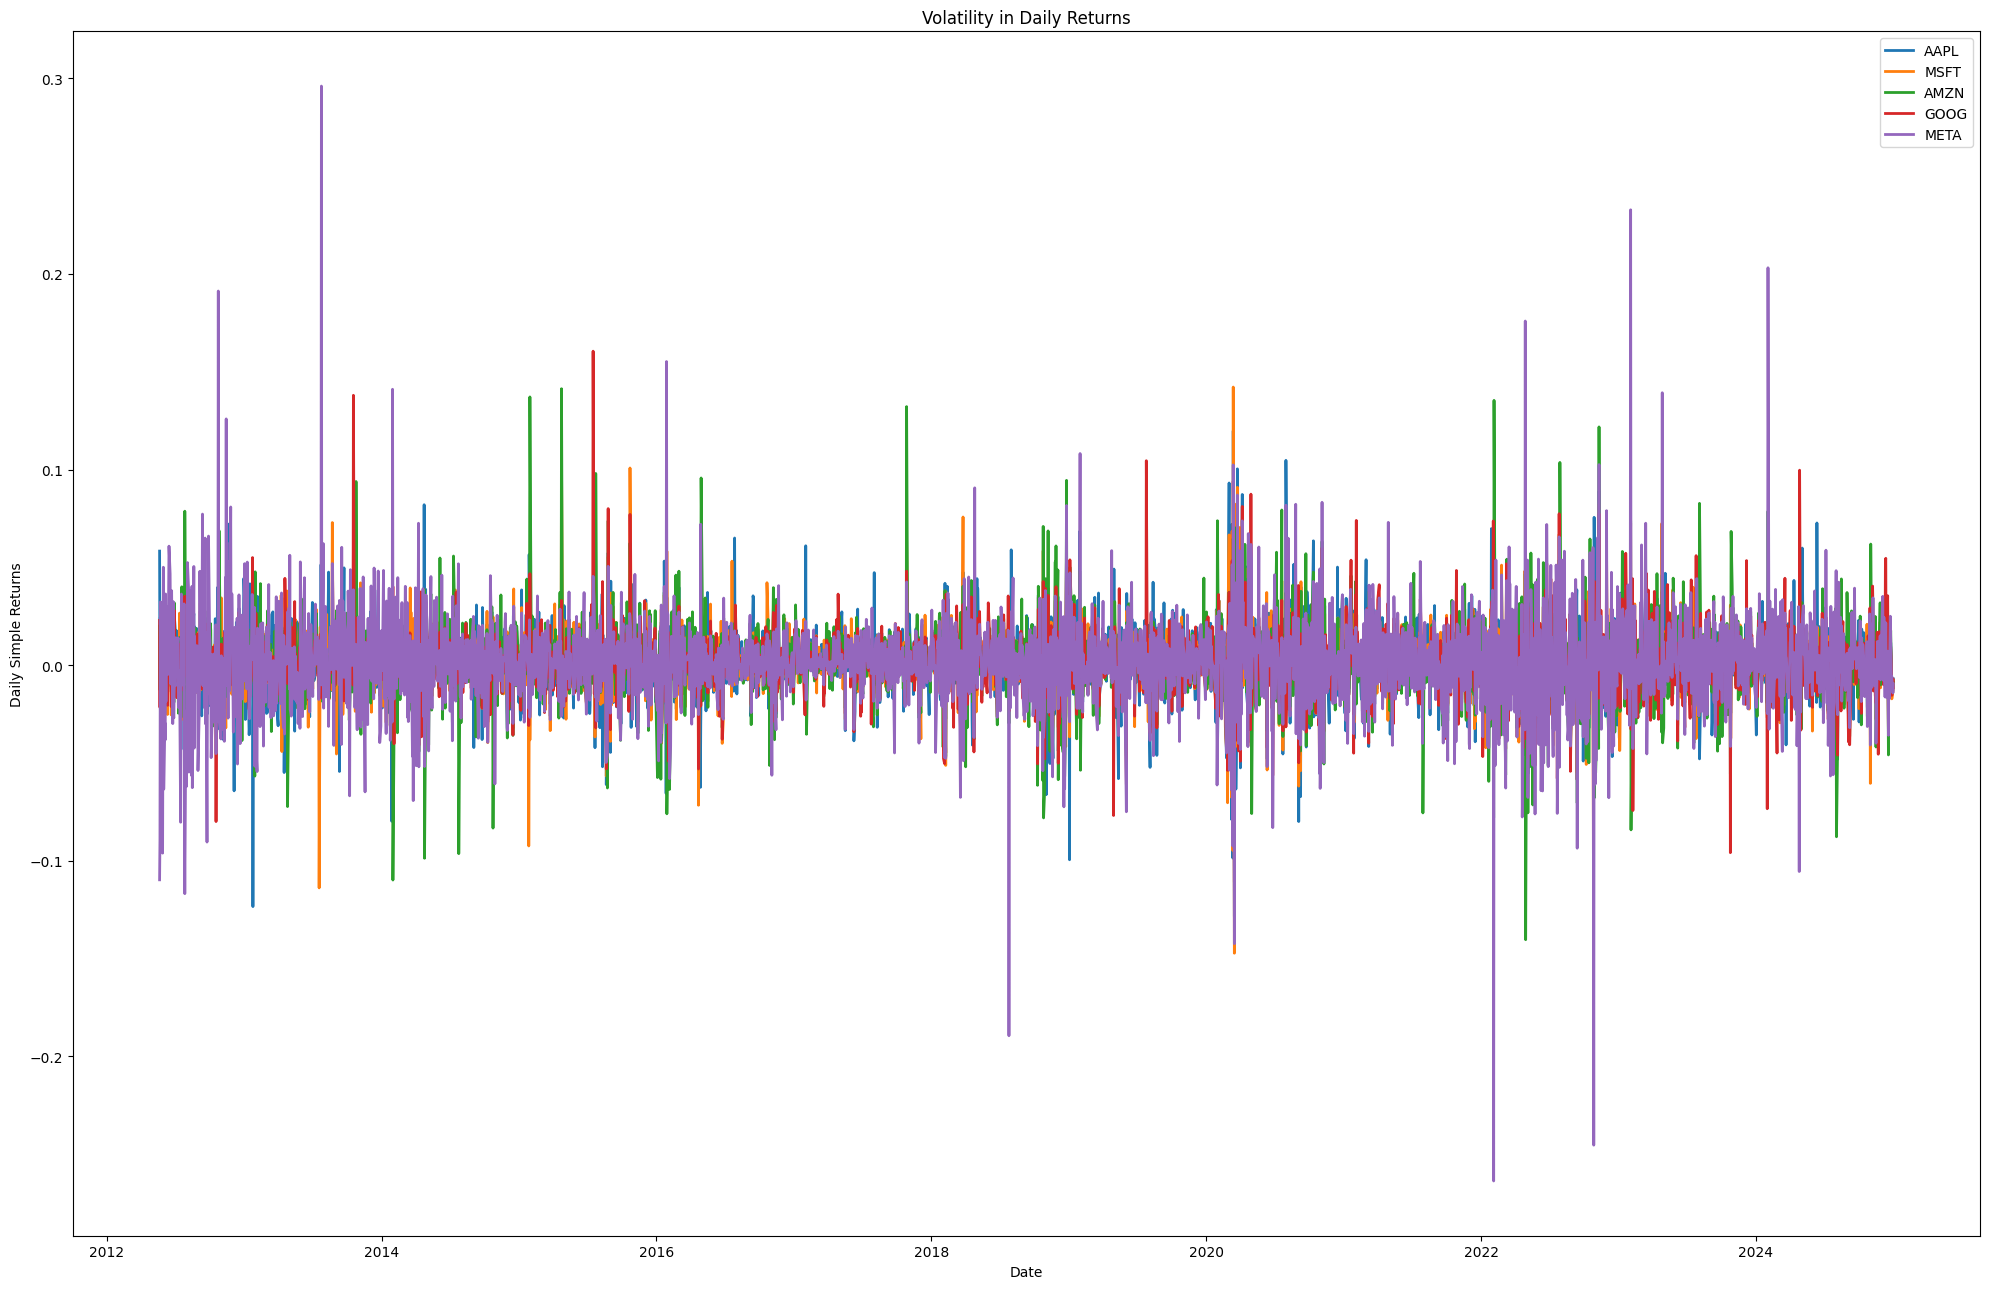

In [8]:
# set figure size
fig=plt.figure(figsize=(20,13))

# add respective plots to figure
for returns in returns_D1.columns.values:
    plt.plot(returns_D1[returns], lw=2, label = returns)

# plot labelling
plt.title("Volatility in Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.legend(loc = "upper right", fontsize = 10)

# little margin for plot
plt.tight_layout()

# save plot and display
plt.show(fig)

In [9]:
# derive the average returns
avg_D1 = returns_D1.mean()
avg_D1 * 100

,0
AAPL,0.102306
MSFT,0.104674
AMZN,0.115522
GOOG,0.094932
META,0.117618


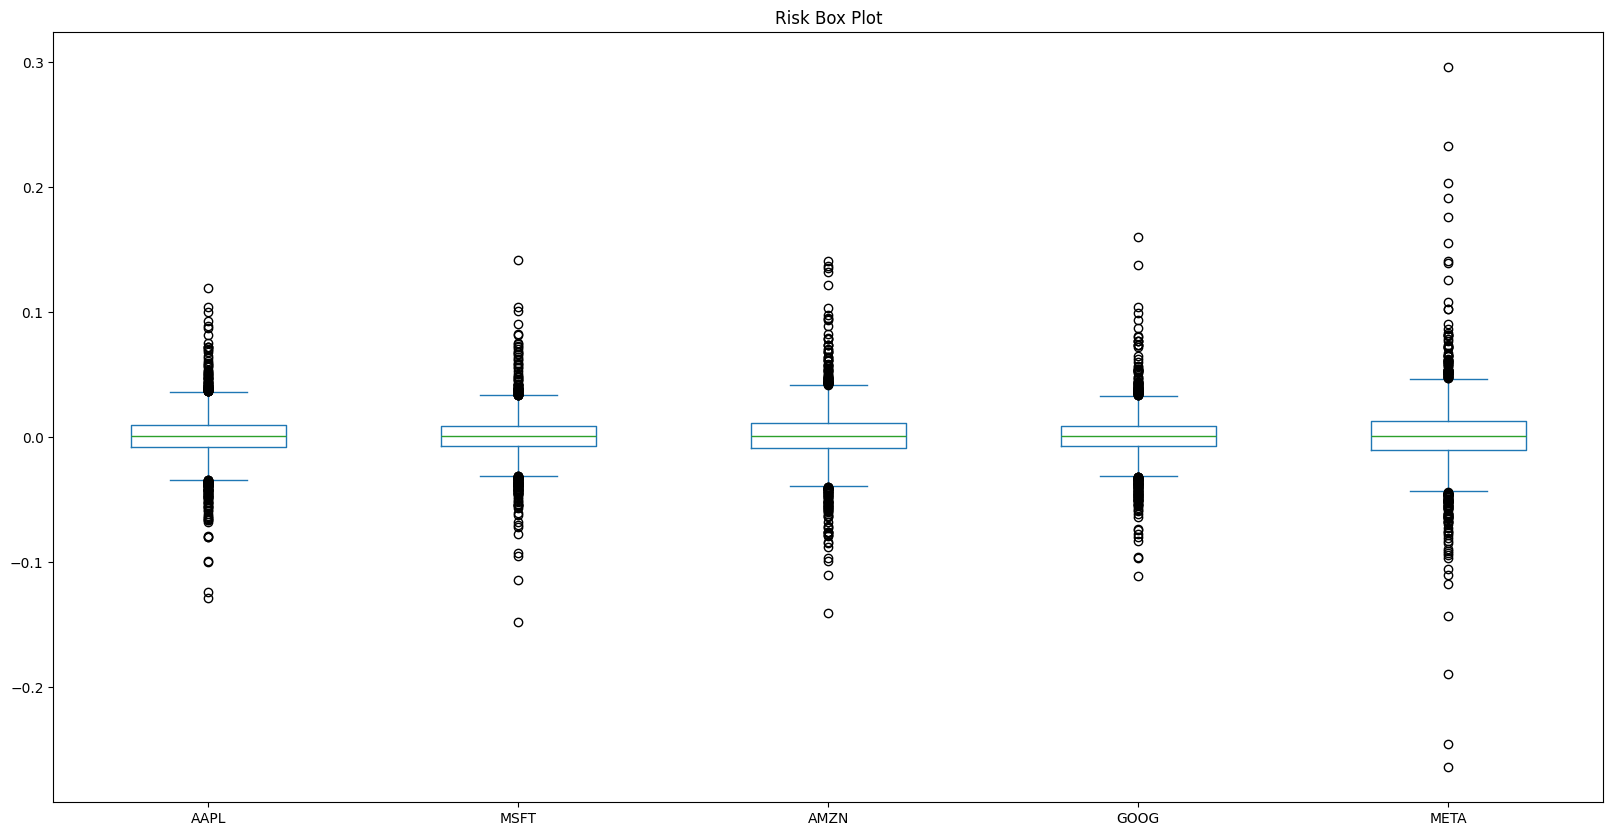

In [10]:
plot = returns_D1.plot(kind = "box", figsize = (20,10), title = "Risk Box Plot")

In [11]:
# derive standard deviation
returns_D1.std() * np.sqrt(252) * 100

,0
AAPL,27.994505
MSFT,26.125428
AMZN,32.026807
GOOG,27.204936
META,39.851234


In [12]:
(avg_D1 - 0.00036) / (returns_D1.std() * np.sqrt(252)) * 100 #(risk free rate, to sharpe ratio)

,0
AAPL,0.236854
MSFT,0.262865
AMZN,0.248298
GOOG,0.216624
META,0.204808


In [13]:
# derive cummulative product of daily returns
cumm_returns = (returns_D1 + 1).cumprod()
cumm_returns

,AAPL,MSFT,AMZN,GOOG,META
2012-05-21 00:00:00,1.058260,1.016399,1.019921,1.022835,0.890139
2012-05-22 00:00:00,1.050134,1.016741,1.006921,1.000666,0.810882
2012-05-23 00:00:00,1.075758,0.994533,1.016039,1.015090,0.837039
2012-05-24 00:00:00,1.065878,0.993167,1.006500,1.005430,0.863981
2012-05-25 00:00:00,1.060165,0.992825,0.995511,0.985227,0.834685
...,...,...,...,...,...
2024-12-24 00:00:00,16.159129,18.777187,21.421557,13.259367,15.957929
2024-12-26 00:00:00,16.210446,18.725044,21.234510,13.227824,15.842396
2024-12-27 00:00:00,15.995785,18.401071,20.925882,13.022460,15.749446
2024-12-30 00:00:00,15.783626,18.157450,20.696750,12.931859,15.524418


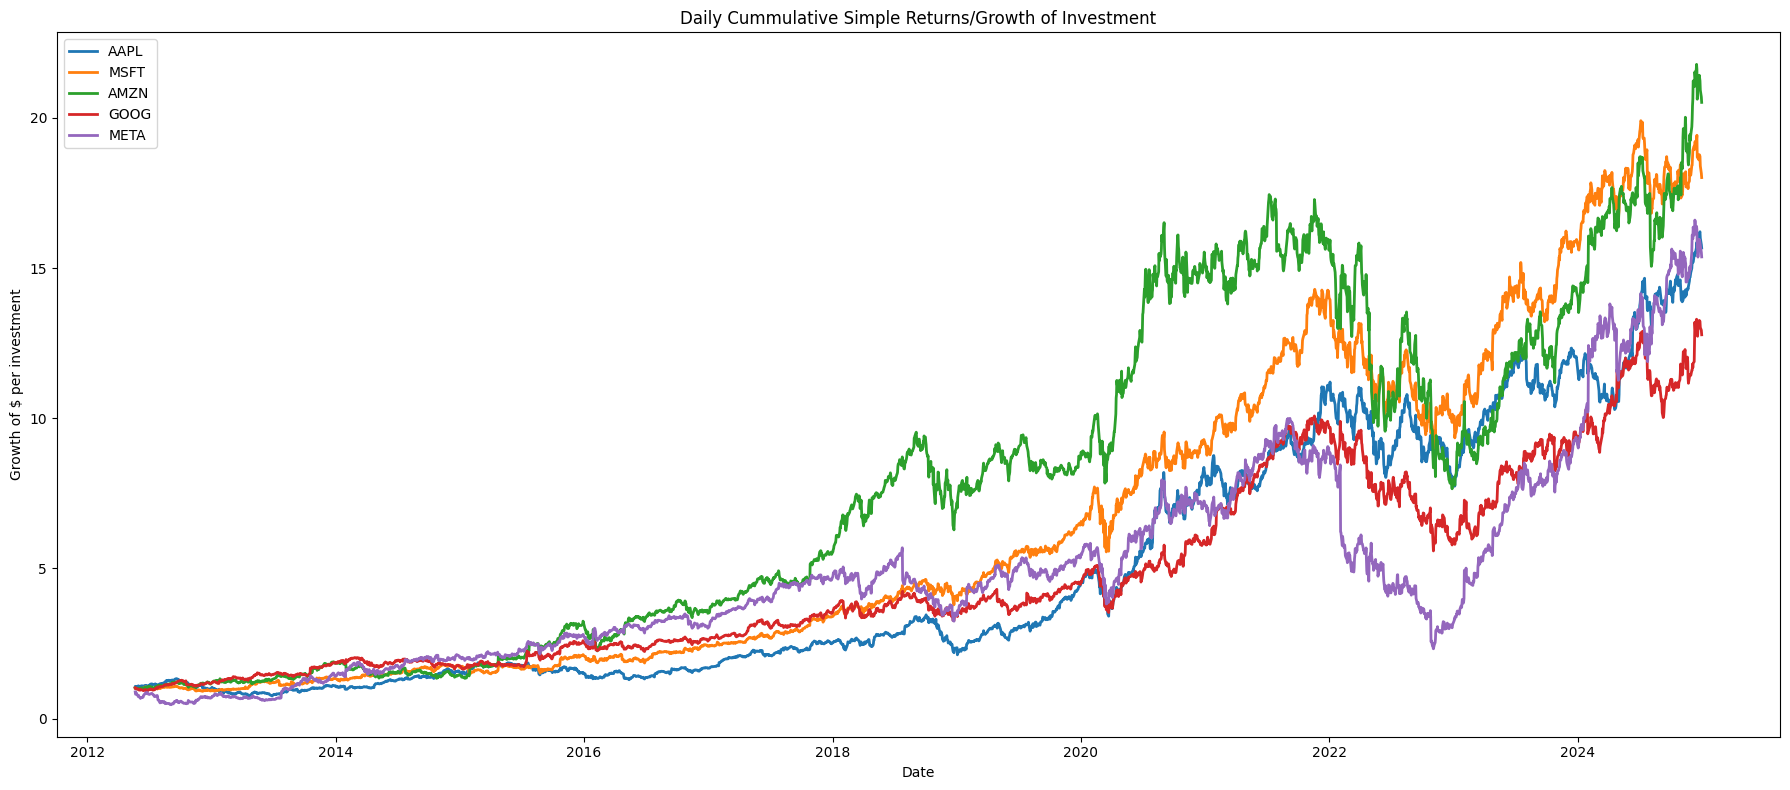

In [14]:
fig = plt.figure(figsize=(18,8))

# add respective plots to figure
for returns in cumm_returns.columns.values:
    plt.plot(cumm_returns[returns], lw=2, label = returns)

# plots labels
plt.legend(loc = "upper left", fontsize=10)
plt.title("Daily Cummulative Simple Returns/Growth of Investment")
plt.xlabel("Date")
plt.ylabel("Growth of $ per investment")
plt.tight_layout()

# save plot and display
plt.show(fig)

Conclusions


In [15]:
# 1. Descriptive Statistics
print(historical_data.describe())

              AAPL         MSFT         AMZN         GOOG         META
count  3774.000000  3774.000000  3774.000000  3774.000000  3175.000000
mean     67.521690   129.578311    71.444840    61.155671   184.802719
std      65.602672   124.987870    61.124111    47.209991   129.794710
min       5.779476    17.447613     5.430500    10.809839    17.646832
25%      17.461679    28.772200    14.987375    22.475652    87.582226
50%      35.323715    64.985470    48.394751    46.254169   165.062057
75%     126.909618   228.535416   120.965000    93.726067   241.695877
max     258.735504   464.854340   232.929993   197.934509   631.608093


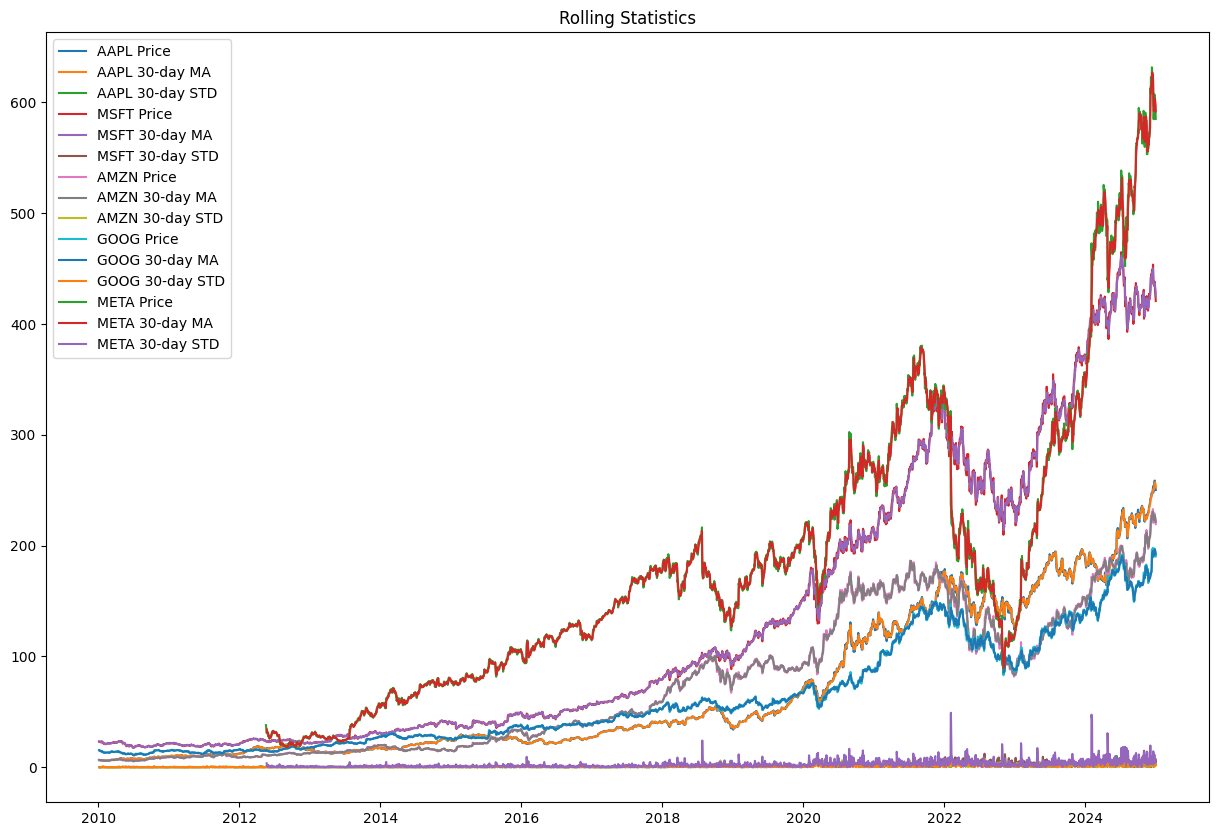

In [16]:
# Rolling Statistics
rolling_mean = historical_data.rolling(window=3).mean() # change this based on the time period you wanna use.
rolling_std = historical_data.rolling(window=3).std() # change this based on the time period you wanna use.

plt.figure(figsize=(15, 10))
for symbol in ticker_symbols:
    plt.plot(historical_data.index, historical_data[symbol], label=f'{symbol} Price')
    plt.plot(rolling_mean.index, rolling_mean[symbol], label=f'{symbol} 30-day MA')
    plt.plot(rolling_std.index, rolling_std[symbol], label=f'{symbol} 30-day STD')
plt.legend()
plt.title('Rolling Statistics')
plt.show()


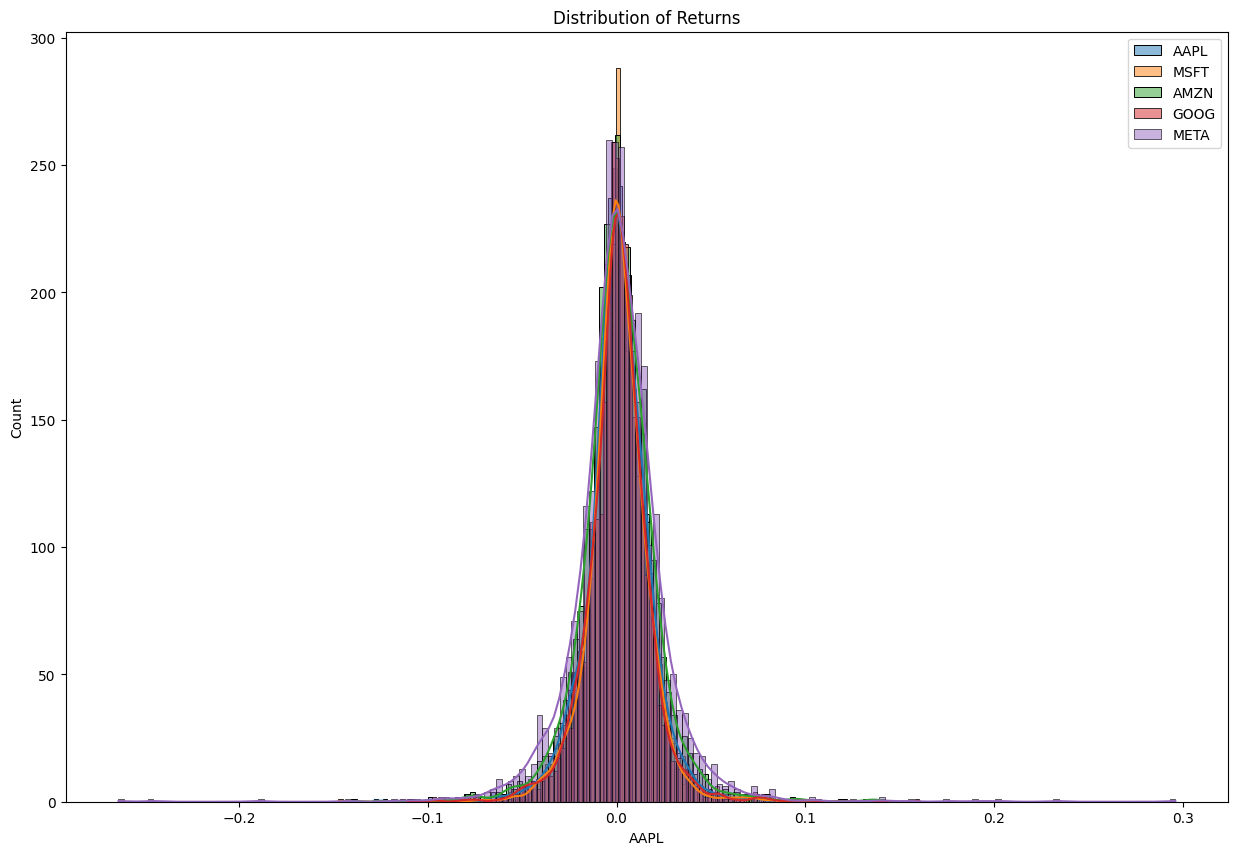

In [17]:
# Distribution Analysis
plt.figure(figsize=(15, 10))
for symbol in ticker_symbols:
    # containing daily returns
    sns.histplot(returns_D1[symbol], kde=True, label=symbol)
plt.legend()
plt.title('Distribution of Returns')
plt.show()

Longer left tail - classic equity market. (Write furhter)


In [18]:
# Skewness and Kurtosis
skewness = returns_D1.skew()
kurtosis = returns_D1.kurtosis()
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 AAPL   -0.103808
MSFT    0.007935
AMZN    0.256314
GOOG    0.378325
META    0.402099
dtype: float64

Kurtosis:
 AAPL     5.661867
MSFT     8.163616
AMZN     6.296984
GOOG     7.925889
META    21.117039
dtype: float64


In [19]:
# Value at Risk (VaR)
var_95 = returns_D1.quantile(0.05)
print("\nValue at Risk (95%):\n", var_95)



Value at Risk (95%):
 AAPL   -0.026513
MSFT   -0.024865
AMZN   -0.029853
GOOG   -0.025394
META   -0.036197
Name: 0.05, dtype: float64


<Figure size 1500x1000 with 0 Axes>

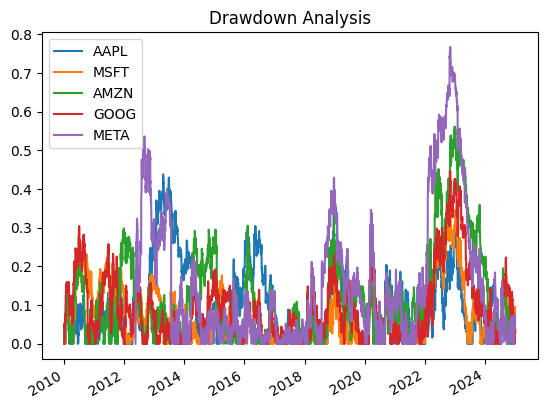

In [20]:
# Drawdown Analysis
def calculate_drawdown(data):
    return (data.cummax() - data) / data.cummax()

drawdowns = calculate_drawdown(historical_data)
plt.figure(figsize=(15, 10))
drawdowns.plot()
plt.title('Drawdown Analysis')
plt.show()


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1500x1000 with 0 Axes>

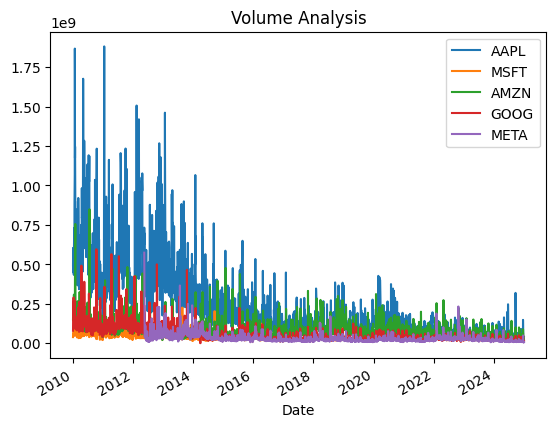

In [21]:
# Volume Analysis (if available)
volume_data = pd.DataFrame()
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    volume_data[ticker_symbol] = data['Volume']

plt.figure(figsize=(15, 10))
volume_data.plot()
plt.title('Volume Analysis')
plt.show()

In [22]:
#Beta Calculation
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']
market_returns = market_data.pct_change().dropna()

# Ensure both DataFrames have the same date range
common_index = returns_D1.index.intersection(market_returns.index)
returns_D1 = returns_D1.loc[common_index]
market_returns = market_returns.loc[common_index]

market_returns_1d = market_returns.squeeze().values

beta_data = []

for symbol in ticker_symbols:
    covariance = np.cov(returns_D1[symbol], market_returns_1d)[0,1]
    market_variance = np.var(market_returns_1d)
    beta = covariance / market_variance
    beta_data.append({'Symbol': symbol, 'Beta': beta})

beta_df = pd.DataFrame(beta_data)
print("\nBetas DataFrame:")
print(beta_df)

[*********************100%***********************]  1 of 1 completed


Betas DataFrame:
  Symbol      Beta
0   AAPL  1.160862
1   MSFT  1.193092
2   AMZN  1.165817
3   GOOG  1.136141
4   META  1.244328


In [23]:
# Check for missing values
if historical_data.isnull().values.any():
    print("Missing values detected. Filling missing values with forward fill.")
    historical_data.ffill(inplace=True)  # Forward fill
    historical_data.bfill(inplace=True)  # Backward fill as a fallback

Missing values detected. Filling missing values with forward fill.


In [24]:
historical_data

,AAPL,MSFT,AMZN,GOOG,META
2010-01-04 00:00:00,6.440331,23.254055,6.695000,15.536650,38.050663
2010-01-05 00:00:00,6.451466,23.261570,6.734500,15.468233,38.050663
2010-01-06 00:00:00,6.348847,23.118809,6.612500,15.078298,38.050663
2010-01-07 00:00:00,6.337109,22.878382,6.500000,14.727282,38.050663
2010-01-08 00:00:00,6.379241,23.036158,6.676000,14.923613,38.050663
...,...,...,...,...,...
2024-12-24 00:00:00,257.916443,438.450836,229.050003,197.345184,607.209778
2024-12-26 00:00:00,258.735504,437.233276,227.050003,196.875717,602.813660
2024-12-27 00:00:00,255.309296,429.668457,223.750000,193.819183,599.276855
2024-12-30 00:00:00,251.923019,423.979858,221.300003,192.470734,590.714417


In [25]:
historical_data.head()

,AAPL,MSFT,AMZN,GOOG,META
2010-01-04 00:00:00,6.440331,23.254055,6.6950,15.536650,38.050663
2010-01-05 00:00:00,6.451466,23.261570,6.7345,15.468233,38.050663
2010-01-06 00:00:00,6.348847,23.118809,6.6125,15.078298,38.050663
2010-01-07 00:00:00,6.337109,22.878382,6.5000,14.727282,38.050663
2010-01-08 00:00:00,6.379241,23.036158,6.6760,14.923613,38.050663


In [26]:
def create_xy(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        end_ix = i + time_step
        if end_ix > len(data)-1:
            break
        seq_x = data[i:end_ix]
        X.append(seq_x)
        y.append(data[end_ix])
    return np.array(X), np.array(y)

In [27]:
assets = historical_data.columns

AAPL - Epoch [1/100], Loss: 0.8588
AAPL - Epoch [11/100], Loss: 0.0847
AAPL - Epoch [21/100], Loss: 0.0051
AAPL - Epoch [31/100], Loss: 0.0176
AAPL - Epoch [41/100], Loss: 0.0089
AAPL - Epoch [51/100], Loss: 0.0034
AAPL - Epoch [61/100], Loss: 0.0019
AAPL - Epoch [71/100], Loss: 0.0018
AAPL - Epoch [81/100], Loss: 0.0018
AAPL - Epoch [91/100], Loss: 0.0018
AAPL - Validation Loss: 0.0110, Test Loss: 1.7289
MSFT - Epoch [1/100], Loss: 0.9297
MSFT - Epoch [11/100], Loss: 0.0185
MSFT - Epoch [21/100], Loss: 0.0003
MSFT - Epoch [31/100], Loss: 0.0131
MSFT - Epoch [41/100], Loss: 0.0072
MSFT - Epoch [51/100], Loss: 0.0022
MSFT - Epoch [61/100], Loss: 0.0005
MSFT - Epoch [71/100], Loss: 0.0002
MSFT - Epoch [81/100], Loss: 0.0002
MSFT - Epoch [91/100], Loss: 0.0002
MSFT - Validation Loss: 0.0003, Test Loss: 1.7149
AMZN - Epoch [1/100], Loss: 0.7812
AMZN - Epoch [11/100], Loss: 0.0008
AMZN - Epoch [21/100], Loss: 0.0038
AMZN - Epoch [31/100], Loss: 0.0054
AMZN - Epoch [41/100], Loss: 0.0048
AMZ

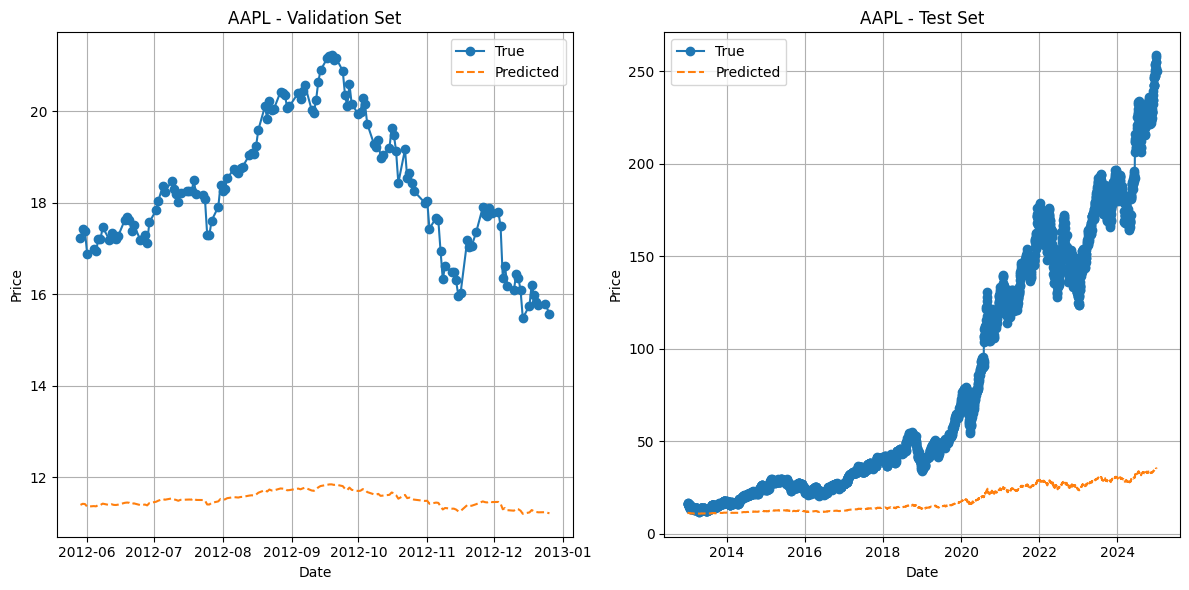

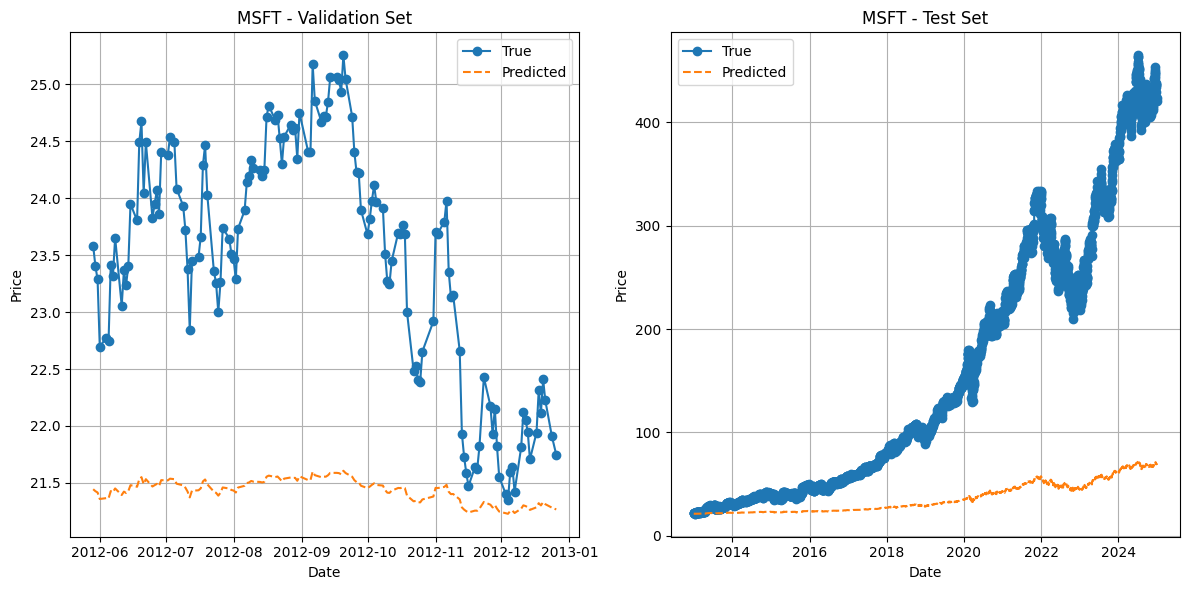

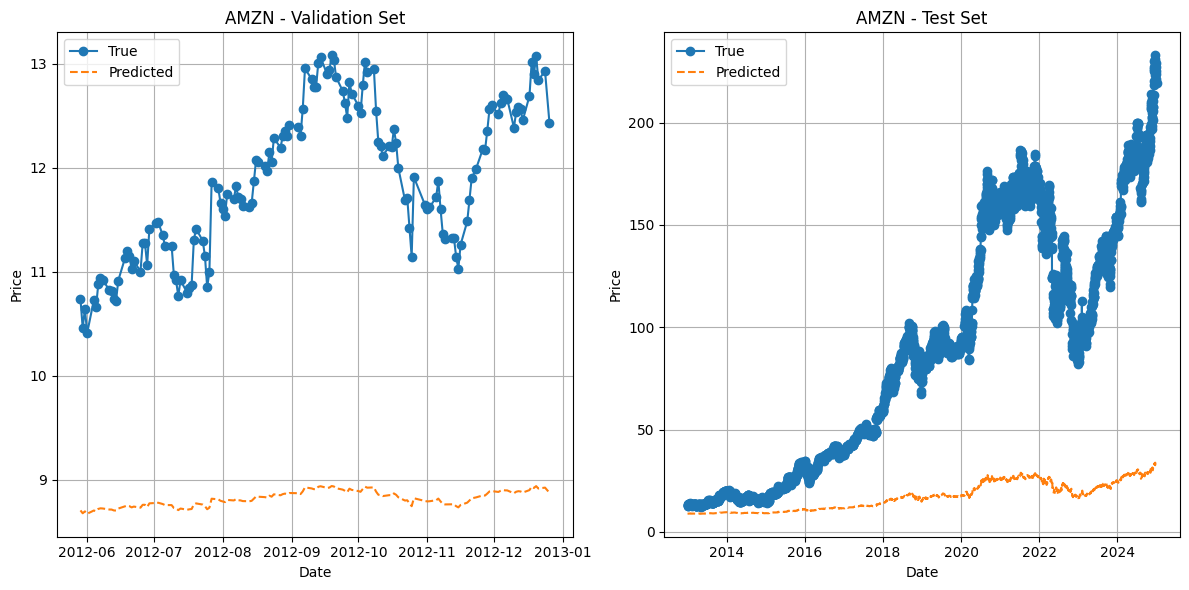

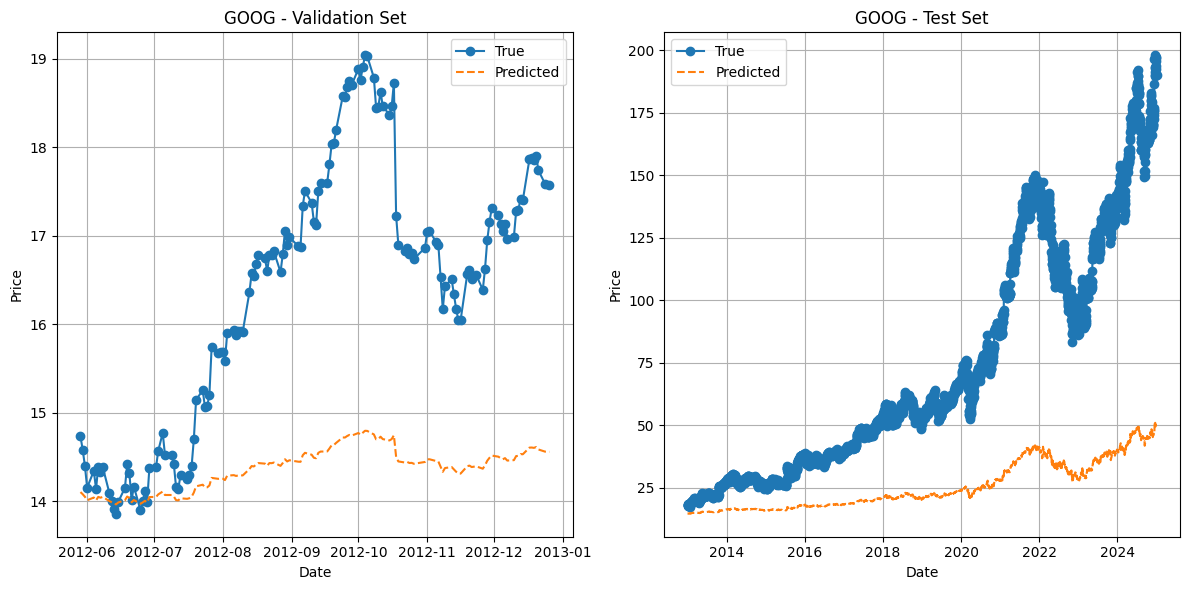

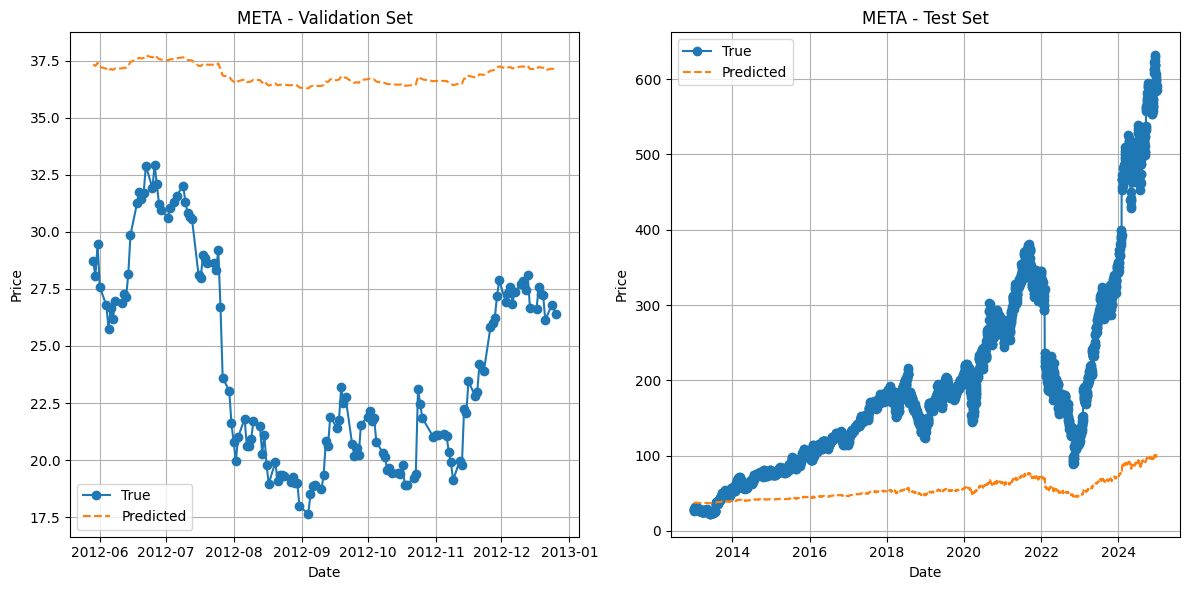

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(0)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, (_, _) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.squeeze()

def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X).numpy()
        actual = y.numpy()
        mae = np.mean(np.abs(actual - predictions))
        mse = np.mean((actual - predictions)**2)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((actual - predictions) / actual)) * 100
        mpe = np.mean((actual - predictions) / actual) * 100
    return mae, mse, rmse, mape, mpe

# Training parameters
train_ratio = 0.79
val_ratio = 0.19
test_ratio = 0.02
epochs = 100
model_perf_df = pd.DataFrame(columns=assets)
all_predictions = {}
y_pred_test_dict = {}
y_true_test_dict = {}
# Initialize a dictionary to store scalers for each stock
scalers = {}

for ticker in historical_data.columns:
    # Create a scaler for each stock
    scaler = StandardScaler()

    # Fit and transform the data for the current stock
    historical_data[ticker] = scaler.fit_transform(historical_data[ticker].values.reshape(-1, 1)).flatten()

    # Store the scaler for later use (e.g., for inverse transformation)
    scalers[ticker] = scaler

for ticker in historical_data.columns:
    # Prepare data
    X, y = create_xy(historical_data[ticker].values, time_step=1)

    X_train, X_val, X_test = X[:605], X[605:751], X[751:]
    y_train, y_val, y_test = y[:605], y[605:751], y[751:]

    # Convert to tensors
    X_train_tensors = torch.FloatTensor(X_train).unsqueeze(-1)
    X_val_tensors = torch.FloatTensor(X_val).unsqueeze(-1)
    X_test_tensors = torch.FloatTensor(X_test).unsqueeze(-1)
    y_train_tensors = torch.FloatTensor(y_train)
    y_val_tensors = torch.FloatTensor(y_val)
    y_test_tensors = torch.FloatTensor(y_test)

    # Initialize model and optimizer
    model = LSTMModel(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1)
    optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-5)
    criterion = nn.MSELoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensors)
        loss = criterion(outputs, y_train_tensors)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'{ticker} - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    # Evaluation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensors)
        test_outputs = model(X_test_tensors)
        val_loss = criterion(val_outputs, y_val_tensors)
        test_loss = criterion(test_outputs, y_test_tensors)
        print(f'{ticker} - Validation Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        # Store predictions
        all_predictions[ticker] = {
            'validation': val_outputs.numpy(),
            'test': test_outputs.numpy()
        }
        # Save y_pred_test for each stock
        y_pred_test_dict[ticker] = test_outputs.numpy()
        y_true_test_dict[ticker] = y_test_tensors.numpy()
        # Evaluate model performance
        mae_val, mse_val, rmse_val, mape_val, mpe_val = evaluate_model(model, X_val_tensors, y_val_tensors)
        mae_test, mse_test, rmse_test, mape_test, mpe_test = evaluate_model(model, X_test_tensors, y_test_tensors)
        model_perf_df[ticker] = [
            [mae_val, mse_val, rmse_val, mape_val, mpe_val],
            [mae_test, mse_test, rmse_test, mape_test, mpe_test]
        ]

print("\nModel Performance Metrics:")
print(model_perf_df)

# When plotting or evaluating, use the stored scalers to inverse transform the data
for ticker in historical_data.columns:
    # Get the true and predicted values for the current asset
    y_true_val = historical_data[ticker][605:751]
    y_true_test = historical_data[ticker][753:]
    y_pred_val = all_predictions[ticker]['validation']
    y_pred_test = all_predictions[ticker]['test']

    # Inverse transform the data
    y_true_val_rescaled = scalers[ticker].inverse_transform(y_true_val.values.reshape(-1, 1)).flatten()
    y_true_test_rescaled = scalers[ticker].inverse_transform(y_true_test.values.reshape(-1, 1)).flatten()
    y_pred_val_rescaled = scalers[ticker].inverse_transform(y_pred_val.reshape(-1, 1)).flatten()
    y_pred_test_rescaled = scalers[ticker].inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

    # Plot using the rescaled data
    plt.figure(figsize=(12, 6))

    # Validation set
    plt.subplot(1, 2, 1)
    plt.plot(y_true_val.index, y_true_val_rescaled, label='True', marker='o')
    plt.plot(y_true_val.index, y_pred_val_rescaled, label='Predicted', linestyle='--')
    plt.title(f'{ticker} - Validation Set')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Test set
    plt.subplot(1, 2, 2)
    plt.plot(y_true_test.index, y_true_test_rescaled, label='True', marker='o')
    plt.plot(y_true_test.index, y_pred_test_rescaled, label='Predicted', linestyle='--')
    plt.title(f'{ticker} - Test Set')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [29]:
import numpy as np
from scipy.optimize import minimize

def optimize_portfolio(data_dict, max_leverage=2.0):
    num_assets = len(data_dict)

    # Calculate percentage change from initial to final value
    percent_changes = np.array([
        (data_dict[ticker][-1] - data_dict[ticker][0]) / data_dict[ticker][0]
        for ticker in data_dict
    ])

    # Define the objective function (negative of the weighted average percent change)
    def objective(weights):
        return -np.sum(percent_changes * weights)

    # Define constraints
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(np.abs(x)) - max_leverage},  # Leverage constraint
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Sum of weights = 1 constraint
    ]

    # Define bounds (-2 to 2 for each asset, allowing 200% short)
    bounds = [(-2, 2) for _ in range(num_assets)]

    # Initial guess (equal weights)
    initial_weights = np.array([1/num_assets] * num_assets)

    # Optimize
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimal_weights = result.x
        expected_portfolio_return = np.sum(percent_changes * optimal_weights)

        return {
            'weights': optimal_weights,
            'expected_return': expected_portfolio_return
        }
    else:
        return None

# Optimize for predicted test data
pred_result = optimize_portfolio(y_pred_test_dict)

# Optimize for true test data
true_result = optimize_portfolio(y_true_test_dict)

# Print results for predicted test data
if pred_result:
    print("Predicted Test Data Optimization Results:")
    print("Optimal weights:")
    for ticker, weight in zip(y_pred_test_dict.keys(), pred_result['weights']):
        print(f"{ticker}: {weight:.4f}")
    print(f"Sum of weights: {np.sum(pred_result['weights']):.4f}")
    print(f"Expected portfolio return: {pred_result['expected_return']:.4f}")
else:
    print("Optimization for predicted test data failed to converge.")

print("\n")

Predicted Test Data Optimization Results:
Optimal weights:
AAPL: -0.5000
MSFT: 0.3200
AMZN: 0.6948
GOOG: 0.0007
META: 0.4846
Sum of weights: 1.0000
Expected portfolio return: -0.4371




In [30]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


# Define ticker symbols and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2010-01-01'
end_date = '2025-01-01'
prediction_end_date = '2025-01-15'  # Adjust as needed

# Download prediction period data
prediction_data = yf.download(tickers, start=end_date, end=prediction_end_date)['Close']
prediction_returns = prediction_data.pct_change().dropna()


# Calculate true returns using optimal weights
optimal_weights = np.array([-0.5000, 1.2788, 0.0769, 0.0144, 0.1299])
true_returns = np.sum(prediction_returns.mul(optimal_weights, axis=1))
true_portfolio_return = true_returns.sum()

print("True Portfolio Return:", true_portfolio_return)

[*********************100%***********************]  5 of 5 completed

True Portfolio Return: 0.0076876152941460895



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define ticker symbols and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2010-01-01'
end_date = '2025-01-01'
prediction_end_date = '2025-01-15'

# Download historical data
historical_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate returns
returns = historical_data.pct_change().dropna()

# Calculate volatility
volatility = returns.std()

# Define portfolio functions
def inverse_volatility_portfolio(volatility):
    """Calculates portfolio weights using inverse volatility strategy."""
    weights = 1 / volatility
    return weights / np.sum(weights)  # Normalize weights

def mean_variance_portfolio(returns, risk_free_rate=0.036):
    """Calculates portfolio weights using mean-variance optimization."""
    num_assets = len(returns.columns)
    # Define the objective function outside the minimize call
    def objective_function(weights):
        return -portfolio_return(weights, returns) / portfolio_volatility(weights, returns.cov())

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(
        objective_function,  # Use the defined objective function here
        num_assets * [1. / num_assets, ],
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x

def portfolio_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def global_min_variance_portfolio(returns):
    """Calculates portfolio weights using global minimum variance strategy."""
    num_assets = returns.shape[1]
    cov_matrix = returns.cov() * 252  # Annualize the covariance matrix

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Constraint: sum of weights = 1
    bounds = tuple((0, 1) for _ in range(num_assets))  # Bounds: weights between 0 and 1
    result = minimize(
        portfolio_volatility,
        num_assets * [1. / num_assets, ],  # Initial guess (equal weights)
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x
# Equal Weight Portfolio
def equal_weight_portfolio(n_assets):
    return np.array([1/n_assets] * n_assets)

# Calculate portfolio weights
inv_vol_weights = inverse_volatility_portfolio(volatility)
mean_var_weights = mean_variance_portfolio(returns)
gmv_weights = global_min_variance_portfolio(returns)
equal_weights = equal_weight_portfolio(len(tickers))

# Download prediction period data
prediction_data = yf.download(tickers, start=end_date, end=prediction_end_date)['Close']
prediction_returns = prediction_data.pct_change().dropna()

# Calculate portfolio returns
inv_vol_return = np.sum(prediction_returns.mul(inv_vol_weights, axis=1))
mean_var_return = np.sum(prediction_returns.mul(mean_var_weights, axis=1))
gmv_return = np.sum(prediction_returns.mul(gmv_weights, axis=1))
equal_weight_return = np.sum(prediction_returns.mul(equal_weights, axis=1))

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
# Change prediction_end_date to a date later than end_date
prediction_end_date = '2025-01-15'  # Or any date after '2025-01-01'
sp500_data = sp500.history(start=end_date, end=prediction_end_date)

# Check if sp500_data is empty before calculating return
if sp500_data.empty:
    sp500_return = 0  # Or handle the empty case appropriately
else:
    sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1

# Download risk-free rate data (10-Year Treasury Yield)
risk_free = yf.Ticker("^TNX")
risk_free_data = risk_free.history(start=end_date, end=prediction_end_date)
risk_free_rate = risk_free_data['Close'].mean() / 100  # Convert to decimal and take average

# Print all returns
print("Inverse Volatility Portfolio Return:", inv_vol_return.sum())
print("Mean Variance Portfolio Return:", mean_var_return.sum())
print("Global Minimum Variance Portfolio Return:", gmv_return.sum())
print("Equal Weight Portfolio Return:", equal_weight_return.sum())
print("S&P 500 Return:", sp500_return)
print("Risk-Free Rate:", risk_free_rate)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-31-d47543687210>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1


Inverse Volatility Portfolio Return: -0.013295607335107894
Mean Variance Portfolio Return: -0.017096639727453976
Global Minimum Variance Portfolio Return: -0.015433582938540406
Equal Weight Portfolio Return: -0.013028463531691736
S&P 500 Return: -0.004368992219682677
Risk-Free Rate: 0.046915000081062315


In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define ticker symbols and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2010-01-01'
end_date = '2025-01-01'
prediction_end_date = '2025-01-15'

# Download historical data
historical_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate returns
returns = historical_data.pct_change().dropna()

# Calculate volatility
volatility = returns.std()

# Existing portfolio functions (inverse_volatility_portfolio, mean_variance_portfolio, global_min_variance_portfolio) remain unchanged

# Equal Weight Portfolio
def equal_weight_portfolio(n_assets):
    return np.array([1/n_assets] * n_assets)

# Calculate portfolio weights
inv_vol_weights = inverse_volatility_portfolio(volatility)
mean_var_weights = mean_variance_portfolio(returns)
gmv_weights = global_min_variance_portfolio(returns)
equal_weights = equal_weight_portfolio(len(tickers))

# Download prediction period data
prediction_data = yf.download(tickers, start=end_date, end=prediction_end_date)['Close']
prediction_returns = prediction_data.pct_change().dropna()

# Calculate portfolio returns
inv_vol_return = np.sum(prediction_returns.mul(inv_vol_weights, axis=1))
mean_var_return = np.sum(prediction_returns.mul(mean_var_weights, axis=1))
gmv_return = np.sum(prediction_returns.mul(gmv_weights, axis=1))
equal_weight_return = np.sum(prediction_returns.mul(equal_weights, axis=1))

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=end_date, end=prediction_end_date)
# Check if sp500_data is empty before calculating return
if sp500_data.empty:
    sp500_return = 0  # Or handle the empty case appropriately
else:
    sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1

# Download risk-free rate data (10-Year Treasury Yield)
risk_free = yf.Ticker("^TNX")
risk_free_data = risk_free.history(start=end_date, end=prediction_end_date)
risk_free_rate = risk_free_data['Close'].mean() / 100  # Convert to decimal and take average

# Print all returns
print("Inverse Volatility Portfolio Return:", inv_vol_return.sum())
print("Mean Variance Portfolio Return:", mean_var_return.sum())
print("Global Minimum Variance Portfolio Return:", gmv_return.sum())
print("Equal Weight Portfolio Return:", equal_weight_return.sum())
print("S&P 500 Return:", sp500_return)
print("Risk-Free Rate:", risk_free_rate)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-32-c8ae27504954>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1


Inverse Volatility Portfolio Return: -0.013295607335107894
Mean Variance Portfolio Return: -0.017096639727453976
Global Minimum Variance Portfolio Return: -0.015433582938540406
Equal Weight Portfolio Return: -0.013028463531691736
S&P 500 Return: -0.004368992219682677
Risk-Free Rate: 0.046915000081062315


In [33]:
def mean_variance_portfolio(returns, risk_free_rate=0.036):
    """Calculates portfolio weights using mean-variance optimization."""
    num_assets = len(returns.columns)
    # Define the objective function outside the minimize call
    def objective_function(weights):
        return -portfolio_return(weights, returns) / portfolio_volatility(weights, returns.cov())

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(
        objective_function,  # Use the defined objective function here
        num_assets * [1. / num_assets, ],
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x

In [34]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define ticker symbols and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2010-01-01'
end_date = '2025-01-01'
prediction_end_date = '2025-01-15'

# Download historical data
historical_data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate returns
returns = historical_data.pct_change().dropna()

# Calculate volatility
volatility = returns.std()

# Define portfolio functions
def inverse_volatility_portfolio(volatility):
    """Calculates portfolio weights using inverse volatility strategy."""
    weights = 1 / volatility
    return weights / np.sum(weights)  # Normalize weights

def mean_variance_portfolio(returns, risk_free_rate=0.036):
    """Calculates portfolio weights using mean-variance optimization."""
    num_assets = len(returns.columns)

    # Define the objective function to take only weights (x) as input
    def objective_function(weights):
        # Access returns from the enclosing scope
        return -portfolio_return(weights, returns) / portfolio_volatility(weights, returns.cov())

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Constraint: weights sum to 1
    bounds = tuple((0, 1) for asset in range(num_assets))  # Bounds: weights between 0 and 1
    result = minimize(
        objective_function,  # Pass the objective function directly
        num_assets * [1. / num_assets, ],
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x

def portfolio_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def global_min_variance_portfolio(returns):
    """Calculates portfolio weights using global minimum variance strategy."""
    num_assets = returns.shape[1]
    cov_matrix = returns.cov() * 252  # Annualize the covariance matrix

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Constraint: sum of weights = 1
    bounds = tuple((0, 1) for _ in range(num_assets))  # Bounds: weights between 0 and 1
    result = minimize(
        portfolio_volatility,
        num_assets * [1. / num_assets, ],  # Initial guess (equal weights)
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x
# Equal Weight Portfolio
def equal_weight_portfolio(n_assets):
    return np.array([1/n_assets] * n_assets)

# Calculate portfolio weights
inv_vol_weights = inverse_volatility_portfolio(volatility)
mean_var_weights = mean_variance_portfolio(returns)
gmv_weights = global_min_variance_portfolio(returns)
equal_weights = equal_weight_portfolio(len(tickers))

# Download prediction period data
prediction_data = yf.download(tickers, start=start_date, end=end_date)['Close']
prediction_returns = prediction_data.pct_change().dropna()

# Calculate portfolio returns
inv_vol_return = np.sum(prediction_returns.mul(inv_vol_weights, axis=1))
mean_var_return = np.sum(prediction_returns.mul(mean_var_weights, axis=1))
gmv_return = np.sum(prediction_returns.mul(gmv_weights, axis=1))
equal_weight_return = np.sum(prediction_returns.mul(equal_weights, axis=1))

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
# Change prediction_end_date to a date later than end_date
prediction_end_date = '2025-01-15'  # Or any date after '2025-01-01'
sp500_data = sp500.history(start=end_date, end=prediction_end_date)

# Check if sp500_data is empty before calculating return
if sp500_data.empty:
    sp500_return = 0  # Or handle the empty case appropriately
else:
    sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1

# Download risk-free rate data (10-Year Treasury Yield)
risk_free = yf.Ticker("^TNX")
risk_free_data = risk_free.history(start=end_date, end=prediction_end_date)
risk_free_rate = risk_free_data['Close'].mean() / 100  # Convert to decimal and take average

# Print all returns
print("Inverse Volatility Portfolio Return:", inv_vol_return.sum())
print("Mean Variance Portfolio Return:", mean_var_return.sum())
print("Global Minimum Variance Portfolio Return:", gmv_return.sum())
print("Equal Weight Portfolio Return:", equal_weight_return.sum())
print("S&P 500 Return:", sp500_return)
print("Risk-Free Rate:", risk_free_rate)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed

Inverse Volatility Portfolio Return: 3.3643153724857786
Mean Variance Portfolio Return: 3.3853821182071937
Global Minimum Variance Portfolio Return: 3.247185743335104
Equal Weight Portfolio Return: 3.3965184075914108
S&P 500 Return: -0.004368992219682677
Risk-Free Rate: 0.046915000081062315



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-34-4458b56c20a3>:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1


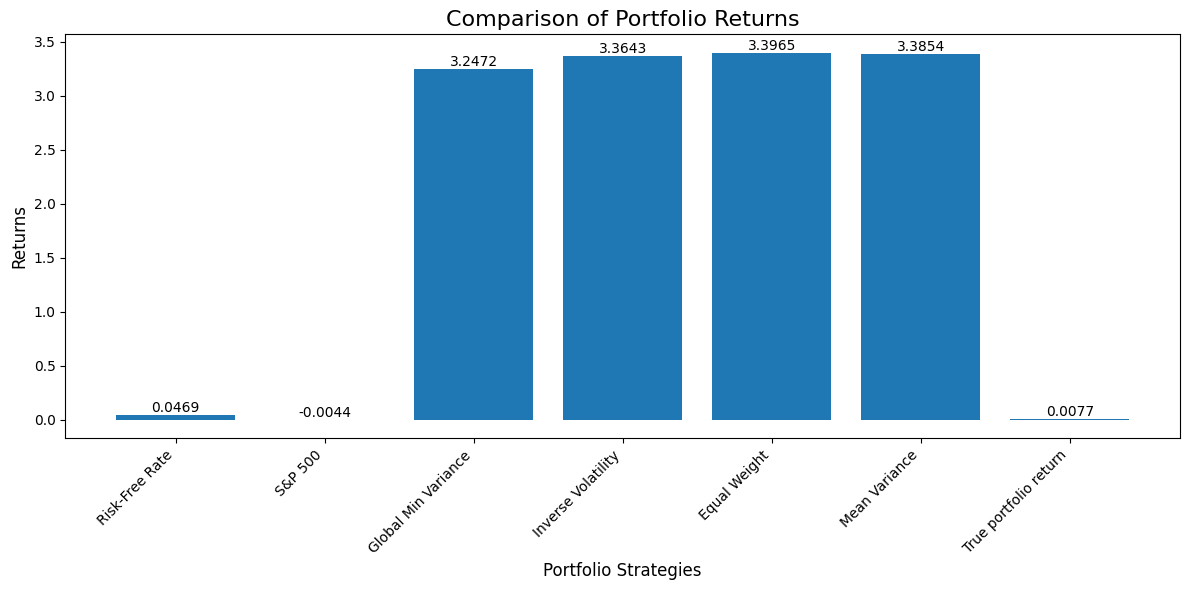

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
strategies = ['Risk-Free Rate','S&P 500','Global Min Variance','Inverse Volatility', 'Equal Weight','Mean Variance', 'True portfolio return']
#Remove 'Expected portfolio return' as pred_result is returning None
#Prepare returns data for plotting, remove pred_result['expected_return']
returns = [risk_free_rate, sp500_return, gmv_return.sum(), inv_vol_return.sum(), equal_weight_return.sum(), mean_var_return.sum(), true_portfolio_return]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(strategies, returns)

# Customize the chart
plt.title('Comparison of Portfolio Returns', fontsize=16)
plt.xlabel('Portfolio Strategies', fontsize=12)
plt.ylabel('Returns', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

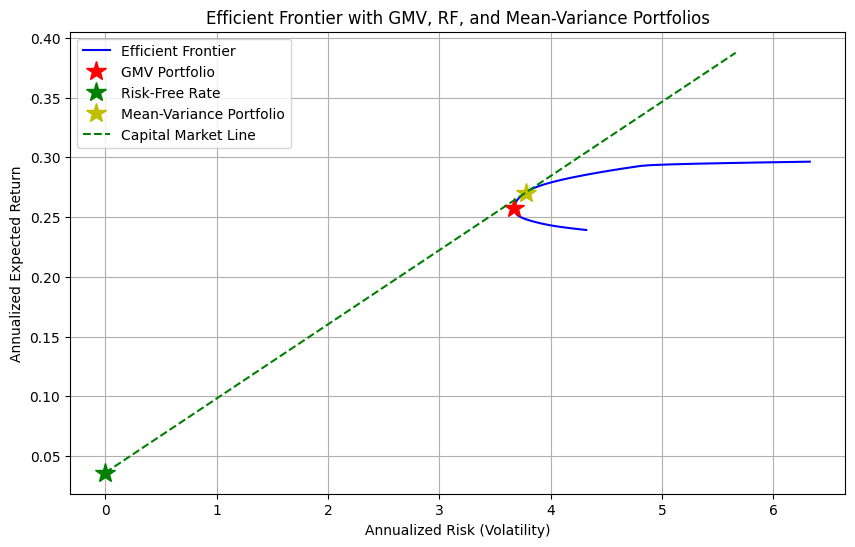

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming historical_data is your DataFrame with adjusted close prices

# Calculate daily returns
returns = historical_data.pct_change().dropna()

# Calculate annualized returns (assuming 252 trading days in a year)
annualized_returns = returns.mean() * 252

# Calculate the variance-covariance matrix
cov_matrix = returns.cov() * 252

def portfolio_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

def gmv_portfolio(cov_matrix):
    n = cov_matrix.shape[0]
    ones = np.ones(n)
    inv_cov = np.linalg.inv(cov_matrix)
    weights = np.dot(inv_cov, ones) / np.dot(ones, np.dot(inv_cov, ones))
    return weights

def efficient_frontier(returns, cov_matrix, target_returns):
    n = returns.shape[1]

    def objective(weights):
        return portfolio_volatility(weights, cov_matrix)

    frontier_volatilities = []

    for target in target_returns:
        constraints = (
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) - target}
        )
        result = minimize(objective, n*[1./n], method='SLSQP', bounds=tuple((0,1) for _ in range(n)), constraints=constraints)
        if result.success:
            frontier_volatilities.append(result.fun)
        else:
            frontier_volatilities.append(np.nan)

    return frontier_volatilities

# Calculate GMV portfolio
gmv_weights = gmv_portfolio(cov_matrix)
gmv_return = portfolio_return(gmv_weights, returns)
gmv_volatility = portfolio_volatility(gmv_weights, cov_matrix)

# Calculate efficient frontier
target_returns = np.linspace(annualized_returns.min(), annualized_returns.max(), 100)
frontier_volatilities = efficient_frontier(returns, cov_matrix, target_returns)

# Remove any NaN values
valid_indices = ~np.isnan(frontier_volatilities)
frontier_volatilities = np.array(frontier_volatilities)[valid_indices]
target_returns = target_returns[valid_indices]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(frontier_volatilities, target_returns, 'b-', label='Efficient Frontier')

# Plot GMV portfolio
plt.plot(gmv_volatility, gmv_return, 'r*', markersize=15, label='GMV Portfolio')

# Plot risk-free rate
rf_rate = 0.036
plt.plot(0, rf_rate, 'g*', markersize=15, label='Risk-Free Rate')

# Plot tangency portfolio (Mean-Variance portfolio)
sharpe_ratios = (target_returns - rf_rate) / frontier_volatilities
tangency_idx = np.argmax(sharpe_ratios)
plt.plot(frontier_volatilities[tangency_idx], target_returns[tangency_idx], 'y*', markersize=15, label='Mean-Variance Portfolio')

# Plot the Capital Market Line (CML)
cml_x = np.linspace(0, frontier_volatilities[tangency_idx] * 1.5, 100)
cml_y = rf_rate + (target_returns[tangency_idx] - rf_rate) * (cml_x / frontier_volatilities[tangency_idx])
plt.plot(cml_x, cml_y, 'g--', label='Capital Market Line')

plt.xlabel('Annualized Risk (Volatility)')
plt.ylabel('Annualized Expected Return')
plt.title('Efficient Frontier with GMV, RF, and Mean-Variance Portfolios')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
## 🎲 Monte Carlo Simulation for Portfolio Risk


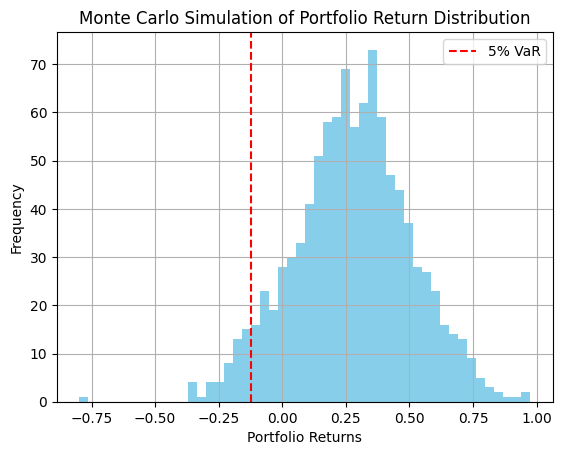

In [38]:
import numpy as np

# Simulation settings
simulations = 1000
time_horizon = 252
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Choose the weights to be used in the simulation - here we are using the inverse volatility portfolio weights.
# You can change this to mean_var_weights, gmv_weights, or equal_weights as needed.
weights = inv_vol_weights

sim_results = np.zeros(simulations)

for i in range(simulations):
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, time_horizon)
    simulated_portfolio = (simulated_returns @ weights)
    sim_results[i] = np.sum(simulated_portfolio)

plt.hist(sim_results, bins=50, color='skyblue')
plt.axvline(x=np.percentile(sim_results, 5), color='r', linestyle='--', label='5% VaR')
plt.title("Monte Carlo Simulation of Portfolio Return Distribution")
plt.xlabel("Portfolio Returns")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Portfolio Risk (Annualized Standard Deviation)
print(f"Inverse Volatility Portfolio Risk: {np.sqrt(np.dot(inv_vol_weights.T, np.dot(cov_matrix * 252, inv_vol_weights))):.4f}")
print(f"Mean Variance Portfolio Risk: {np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix * 252, optimal_weights))):.4f}")
print(f"Global Minimum Variance Portfolio Risk: {np.sqrt(np.dot(gmv_weights.T, np.dot(cov_matrix * 252, gmv_weights))):.4f}")
print(f"Equal Weight Portfolio Risk: {np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix * 252, equal_weights))):.4f}") # Changed eq_weights to equal_weights

# Download S&P 500 data for the same period as prediction_returns
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=start_date, end=end_date)['Close']
sp500_returns = np.log(sp500_data / sp500_data.shift(1)).dropna() # Calculate S&P 500 returns

print(f"S&P 500 Risk: {np.std(sp500_returns) * np.sqrt(252):.4f}") # Now sp500_returns is defined

Inverse Volatility Portfolio Risk: 0.2386
Mean Variance Portfolio Risk: 0.3931
Global Minimum Variance Portfolio Risk: 0.2313
Equal Weight Portfolio Risk: 0.2433
S&P 500 Risk: 0.1728


In [40]:
print(np.std(sp500_returns) * np.sqrt(252))


0.17282726016954647


In [41]:
sharpe_inv_vol = (0.0653 - 0.036) / 0.0528
sharpe_mvo = (0.0695 - 0.036) / 0.0708
sharpe_gmv = (0.0533 - 0.036) / 0.0510
sharpe_eq_weight = (0.0687 - 0.036) / 0.0535

print(f"Sharpe Ratios:\nInverse Vol: {sharpe_inv_vol:.2f}\nMean-Var: {sharpe_mvo:.2f}\nGMV: {sharpe_gmv:.2f}\nEqual Weight: {sharpe_eq_weight:.2f}")


Sharpe Ratios:
Inverse Vol: 0.55
Mean-Var: 0.47
GMV: 0.34
Equal Weight: 0.61


In [42]:
## 🚨 Risk Management Layer


In [43]:
from scipy.stats import norm
import numpy as np

# Assuming you have a DataFrame called 'historical_data' with your asset prices:
# Calculate daily returns
returns = historical_data.pct_change().dropna()

# Assuming you have a portfolio with weights 'weights'
# (e.g., inv_vol_weights, mean_var_weights, gmv_weights, or equal_weights):
portfolio_returns = returns.dot(weights)

# VaR @ 95%
portfolio_mean = np.mean(portfolio_returns)
portfolio_std = np.std(portfolio_returns)
confidence_level = 0.95

VaR_95 = norm.ppf(1 - confidence_level, portfolio_mean, portfolio_std)
CVaR_95 = portfolio_mean - (portfolio_std * norm.pdf(norm.ppf(confidence_level)) / (1 - confidence_level))

print(f"Value at Risk (95%): {VaR_95:.4f}")
print(f"Conditional Value at Risk (95%): {CVaR_95:.4f}")

Value at Risk (95%): -0.0237
Conditional Value at Risk (95%): -0.0299


In [44]:
## 🔁 Backtesting Portfolio Strategy


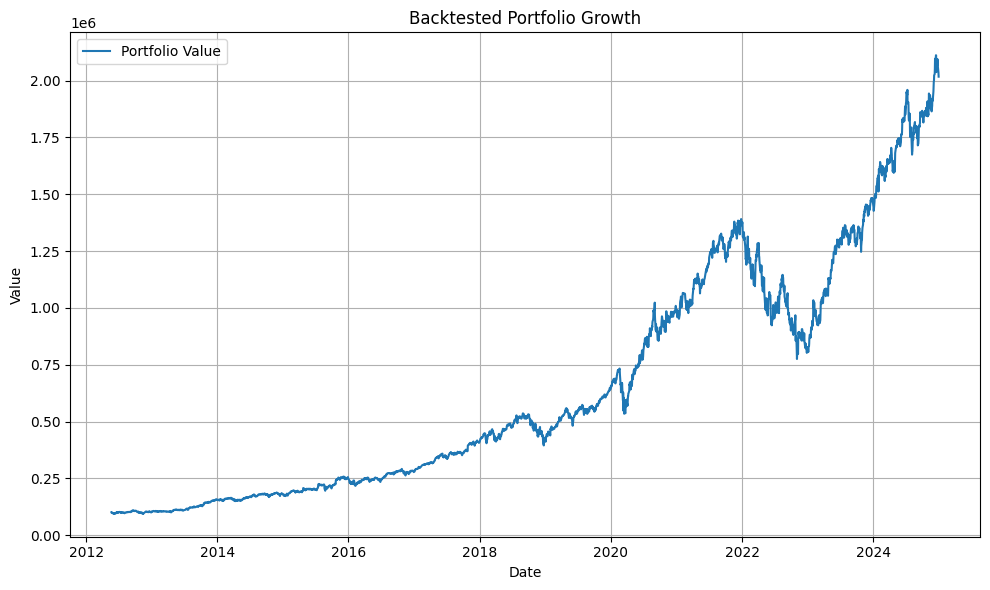

In [45]:
initial_investment = 100000
cumulative_returns = (1 + portfolio_returns).cumprod()
portfolio_value = initial_investment * cumulative_returns

plt.figure(figsize=(10,6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Backtested Portfolio Growth')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## 🔥 Deep Reinforcement Learning-Based Portfolio Optimization using PPO
#Using a custom OpenAI Gym environment with Stable-Baselines3.


In [63]:
!pip install yfinance stable-baselines3 gym pandas matplotlib --quiet


In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
data = yf.download(tickers, start="2010-01-01", end="2025-01-01")['Close']
data = data.fillna(method='ffill').dropna()


In [64]:
import gym
from gym import spaces
import numpy as np

class SimpleTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000):
        super(SimpleTradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.n_steps = len(df)
        self.initial_balance = initial_balance
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(df.columns),), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(len(df.columns) + 1,), dtype=np.float32)
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = np.zeros(len(self.df.columns))
        self.total_asset = self.initial_balance
        return self._get_obs()

    def _get_obs(self):
        prices = self.df.iloc[self.current_step].values
        return np.concatenate([[self.balance], prices])

    def step(self, actions):
        prices = self.df.iloc[self.current_step].values
        actions = np.clip(actions, -1, 1)
        self.shares_held += actions
        self.shares_held = np.clip(self.shares_held, 0, np.inf)
        portfolio_value = np.sum(self.shares_held * prices)
        self.total_asset = self.balance + portfolio_value
        self.current_step += 1
        done = self.current_step >= self.n_steps - 1
        reward = self.total_asset - self.initial_balance
        return self._get_obs(), reward, done, {}

    def render(self):
        print(f"Step: {self.current_step}, Balance: {self.balance}, Total Asset: {self.total_asset}")


In [66]:
!pip install 'shimmy>=2.0'

In [67]:
from stable_baselines3 import PPO

env = SimpleTradingEnv(data)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 373  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 3.17e+03      |
|    ep_rew_mean          | 1.47e+12      |
| time/                   |               |
|    fps                  | 341           |
|    iterations           | 2             |
|    time_elapsed         | 11            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | -2.910383e-11 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.09         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 3.69e+19      |
|    n_updates            | 10            

In [70]:
obs = env.reset()
values = []

for _ in range(env.n_steps - 1):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    values.append(env.total_asset)

# Debug: Check if we have values
print(f"Total steps recorded: {len(values)}")
print(f"Final Portfolio Value: ${values[-1]:.2f}" if values else "No values recorded.")

# Plot it
import matplotlib.pyplot as plt
plt.title("Portfolio Value Over Time (DRL - PPO)", fontsize=14)
plt.figure(figsize=(10, 6))
plt.plot(values, color='green', linewidth=2)
plt.title("💸 Portfolio Value Over Time (DRL - PPO)", fontsize=14)
plt.xlabel("Trading Days", fontsize=12)
plt.ylabel("Total Asset ($)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Total steps recorded: 3174
Final Portfolio Value: $232219151.94


<ipython-input-70-f5822cf2cdf4>:22: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
